# McDonald's Review Analysis

The main goals of this analysis are to: 
1) Utilize the VADER sentiment analysis tool to compute sentiment polarity scores of customer reviews; 
2) Implement topic modeling using LDA to understand the nature of topics in the reviews and find out the most frequent words associated with these topics.

## Data Collection and Cleaning

The data used for this project is *McDonald's Store Reviews* found on Kaggle. The link: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews

The first step is to clean the data to make it appropriate for an analysis. 

In [1]:
# import Pandas library
import pandas as pd

In [2]:
# read in a CSV file with McDonald's Reviews
mcrev = pd.read_csv(r"/Users/zhangirbayanov/Desktop/Data/McDonalds_Reviews/McDonald_s_Reviews.csv", encoding='latin-1')
mcrev.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [3]:
mcrev.shape

(33396, 10)

In [4]:
mcrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
mcrev.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
18149,18150,McDonald's,Fast food restaurant,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",39.852059,-74.981099,933,3 years ago,disapointed,1 star
26963,26964,McDonald's,Fast food restaurant,"10901 Riverside Dr, North Hollywood, CA 91602,...",34.152507,-118.367904,"1,794",5 years ago,Another McDonald's I frequent. The fries here ...,5 stars
23262,23263,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,566",5 years ago,They improved so much the Caramel Iced coffee ...,4 stars
2168,2169,McDonald's,Fast food restaurant,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460,"2,193",2 years ago,Good customer service very clean nice and neat...,5 stars
2339,2340,McDonald's,Fast food restaurant,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460,"2,193",3 years ago,"Tasty food, new design, clean place, cool feat...",5 stars


After reviewing the dataset, it is necessary to save only those columns which will be used in this analysis.

In [6]:
# create a new dataset saving only necessary columns
reviews = mcrev.drop(mcrev.iloc[:, 1:8], axis=1)

reviews.head()

,reviewer_id,review,rating
0,1,Why does it look like someone spit on my food?...,1 star
1,2,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,Made a mobile order got to the speaker and che...,1 star
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,"I repeat my order 3 times in the drive thru, a...",1 star


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reviewer_id  33396 non-null  int64 
 1   review       33396 non-null  object
 2   rating       33396 non-null  object
dtypes: int64(1), object(2)
memory usage: 782.8+ KB


## Data Preprocessing

The data is needed to be formated for increasing the accuracy of VADER scoring sentiment analysis and LDA topic modeling. This includes removing punctuation, lower casing, tokenizing, removing stopwords, and lemmaization.

In [8]:
import re

# remove punctuation and convert to lowercase
pattern = r'[a-zA-Z0-9]+'

reviews['review_processed'] = reviews['review'].apply(lambda x: ' '.join(re.findall(pattern, x)))
reviews['review_processed'] = reviews['review_processed'].map(lambda x: x.lower())

# show the first rows of the processed reviews
reviews['review_processed'].head()

0    why does it look like someone spit on my food ...
1    it d mcdonalds it is what it is as far as the ...
2    made a mobile order got to the speaker and che...
3    my mc crispy chicken sandwich was customer ser...
4    i repeat my order 3 times in the drive thru an...
Name: review_processed, dtype: object

In [9]:
# import libraries
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangirbayanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# load NLTK stop words
stop_words = stopwords.words('english')

# functions for tokenization and stop words removal
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# tokenize
data = reviews.review_processed.values.tolist()
data_words = list(sent_to_words(data))

# show tokenized data
print(data_words[:1][0][:30])

['why', 'does', 'it', 'look', 'like', 'someone', 'spit', 'on', 'my', 'food', 'had', 'normal', 'transaction', 'everyone', 'was', 'chill', 'and', 'polite', 'but', 'now', 'dont', 'want', 'to', 'eat', 'this', 'im', 'trying', 'not', 'to', 'think']


One more step is to build *bigram* and *trigram* (two and three words frequently occuring together) models for further work with topic modeling.

In [11]:
# build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
# functions for bigrams, trigrams, and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'INTJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
# import spaCy library
import spacy

# initialize spacy 'en' model
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# remove stop words
data_words_removed = remove_stopwords(data_words)

# form bigrams
data_words_bigrams = make_bigrams(data_words_removed)

# lemmatize keeping only necessary POS tags 
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'INTJ'])

print(data_lemmatized[:1][0][:30])

['look', 'spit', 'food', 'normal', 'transaction', 'chill', 'polite', 'want', 'eat', 'm', 'try', 'think', 'milky', 'white', 'clear', 'substance', 'food', 'sure', 'come', 'back']


In [14]:
# transfer the lemmatized data into 'review_processed' column
reviews['review_processed'] = data_lemmatized
reviews['review_processed'] = reviews['review_processed'].apply(lambda x: ', '.join(x))

reviews.head()

,reviewer_id,review,rating,review_processed
0,1,Why does it look like someone spit on my food?...,1 star,"look, spit, food, normal, transaction, chill, ..."
1,2,It'd McDonalds. It is what it is as far as the...,4 stars,"mcdonald, far, food, atmosphere, go, staff, ma..."
2,3,Made a mobile order got to the speaker and che...,1 star,"make, mobile, order, get, speaker, check, line..."
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"sandwich, customer, service, quick"
4,5,"I repeat my order 3 times in the drive thru, a...",1 star,"repeat, order, time, drive, thru, still, manag..."


## Explarotary Data Analysis (EDA)

To understand the data and ensure the right track, count of review ratings barplot and a wordcloud (using *wordcloud* package) will be visualized. This step is necessary to be performed before implementing the models.

Text(0.5, 0, 'Review Rating Stars')

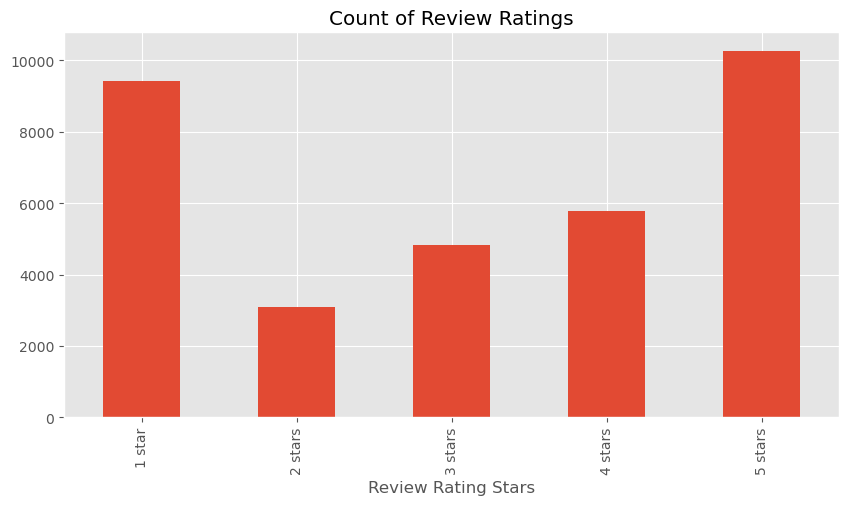

In [15]:
# import library
import matplotlib.pyplot as plt

# visualize a count of review ratings using barplot
plt.style.use('ggplot')

ax = reviews['rating'].value_counts().sort_index().plot(kind='bar',
                                                        title='Count of Review Ratings',
                                                        figsize=(10,5))
ax.set_xlabel('Review Rating Stars')

The barplot above shows the distribution of the review rating stars (1-5) given by the customers who wrote reviews on their experience in McDonald's restaurants.

In [16]:
# copy 'reviews' DataFrame
wc_df = reviews.copy()

# import the wordcloud library
from wordcloud import WordCloud

# join the different processed titles together.
long_string = ','.join(list(wc_df['review_processed'].values))

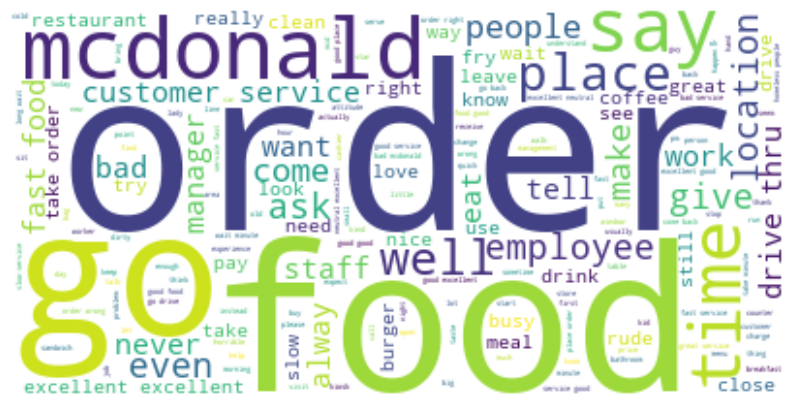

In [17]:
# create a WordCloud object
wordcloud = WordCloud(background_color='white', contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(long_string)

# display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

## VADER Sentiment Scoring

**Valence Aware Dictionary and sEntiment Reasoner** (VADER) will be used as the main sentiment analysis model for this project, because the main goal here is to compare the results of sentiment analysis and actual given scores by customers.

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
# run the polarity score on the dataset
res = {}
for i, row  in tqdm (reviews.iterrows(), total = len(reviews)) :
    review = row['review_processed']
    myid = row['reviewer_id']
    res[myid] = sia.polarity_scores(review)

  0%|          | 0/33396 [00:00<?, ?it/s]

In [20]:
# transform Dictionary into a Pandas DataFrame
vaders = pd.DataFrame(res).T

# merge vaders df into the initial dataset
vaders = vaders.reset_index().rename(columns={'index': 'reviewer_id'})
vaders = vaders.merge(reviews)
vaders.head()

,reviewer_id,neg,neu,pos,compound,review,rating,review_processed
0,1,0.000,0.733,0.267,0.6369,Why does it look like someone spit on my food?...,1 star,"look, spit, food, normal, transaction, chill, ..."
1,2,0.000,0.640,0.360,0.8402,It'd McDonalds. It is what it is as far as the...,4 stars,"mcdonald, far, food, atmosphere, go, staff, ma..."
2,3,0.040,0.960,0.000,-0.0516,Made a mobile order got to the speaker and che...,1 star,"make, mobile, order, get, speaker, check, line..."
3,4,0.000,1.000,0.000,0.0000,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,"sandwich, customer, service, quick"
4,5,0.219,0.781,0.000,-0.7184,"I repeat my order 3 times in the drive thru, a...",1 star,"repeat, order, time, drive, thru, still, manag..."


The modified dataset above shows to what extent are the reviews negative (neg), neutral (neu), and positive (pos). The next step is to see if the assumption is align with VADER scores by plotting the results.

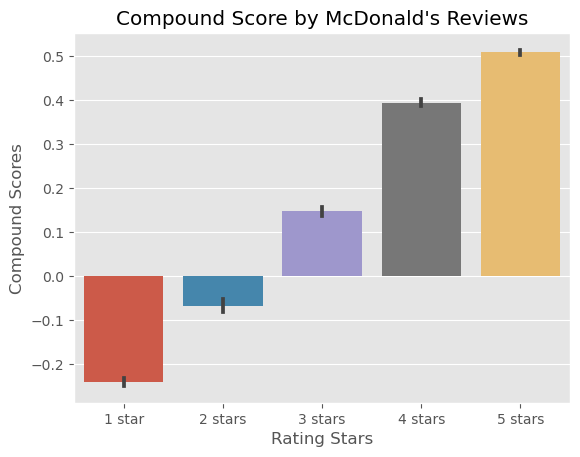

In [21]:
import seaborn as sns

# visualize compund scores on a barplot
sorted_ratings = sorted(vaders['rating'].unique())

ax = sns.barplot(data=vaders, x='rating', y='compound', order=sorted_ratings)
ax.set_title("Compound Score by McDonald's Reviews")
ax.set_xlabel('Rating Stars')
ax.set_ylabel('Compound Scores')
plt.show()

The barplot above shows how compound scores are gradually changed from negative to positive according to their rating stars. The less stars are given in a review, the less is a compund score, and vice versa. It validates that the compound scores of the VADER model are positively related to reviews and rating stars. 

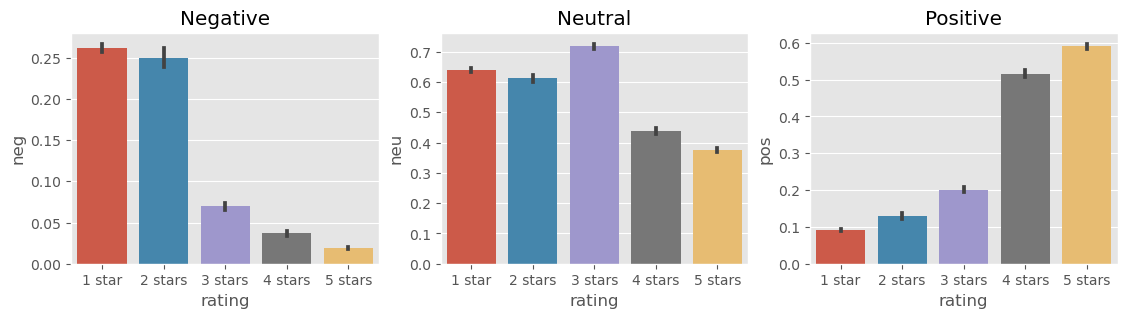

In [22]:
# plot similar barplots with negative, neutral, and positive scores
fig, axs = plt.subplots(1, 3, figsize=(13.5,3))

sns.barplot(data=vaders, x='rating', y='neg', ax=axs[0], order=sorted_ratings)
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1], order=sorted_ratings)
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[2], order=sorted_ratings)
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')

# show the plot
plt.show()

These barplots show similar results to and confirm Compound Score by McDonald's Reviews based on changes in negative, neutral, and positive VADER scores.

## Topic Modeling (LDA)

**Latent Dirichlet Allocation** (LDA) will be implemented as a topic modeling algorithm in this case to uncover common themes in the reviews. Topics will be presented along with the most frequent words related to the topics using *pyLDAvis* library as a visualization tool.

In [23]:
import gensim.corpora as corpora

# create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# create Corpus
texts = data_lemmatized

# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

# view the corpus
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


The corpus above shows *word_id* and *word_frequency*. For instance, the first element (0, 1) implies that the word id 0 occurs only 1 time and etc.

In [24]:
# build lda base model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [25]:
from pprint import pprint

# print the keyword in 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.279*"excellent" + 0.023*"drive" + 0.016*"mcd" + 0.013*"favorite" + '
  '0.013*"thru" + 0.009*"go" + 0.008*"consistent" + 0.007*"always" + '
  '0.007*"third" + 0.007*"mcdonald"'),
 (1,
  '0.065*"food" + 0.043*"mcdonald" + 0.026*"always" + 0.020*"fresh" + '
  '0.018*"fry" + 0.017*"hot" + 0.017*"go" + 0.017*"fast" + 0.015*"eat" + '
  '0.015*"get"'),
 (2,
  '0.031*"clean" + 0.027*"love" + 0.025*"mcdonald" + 0.019*"friendly" + '
  '0.019*"eat" + 0.017*"staff" + 0.016*"area" + 0.015*"go" + 0.014*"well" + '
  '0.013*"place"'),
 (3,
  '0.263*"good" + 0.092*"service" + 0.082*"food" + 0.082*"fast" + '
  '0.031*"place" + 0.029*"clean" + 0.028*"poor" + 0.024*"terrible" + '
  '0.015*"friendly" + 0.012*"customer"'),
 (4,
  '0.036*"order" + 0.030*"get" + 0.027*"bad" + 0.016*"ask" + 0.015*"coffee" + '
  '0.015*"go" + 0.014*"rude" + 0.013*"give" + 0.012*"never" + 0.012*"ok"'),
 (5,
  '0.114*"neutral" + 0.100*"service" + 0.097*"quick" + 0.064*"slow" + '
  '0.016*"busy" + 0.015*"bite" + 0.015*"

In [26]:
from gensim.models import CoherenceModel

# calculate the baseline coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# print the result
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6354429027319395


The next step is **hyperparameter tuning**. After computing the coherence score for the base model, a series of sensitivity test will be performed to discover the model hyperparameters: 1) number of topic (k); 2) dirichlet hyperparameter alpha (a): document-topic density; 3) dirichlet hyperparameter beta (b): word-topic density.

In [27]:
# function for the tests
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [28]:
import numpy as np
import tqdm
import os

# the path to save the results later
notebook_directory = os.path.dirname(os.path.abspath("Reviews NLP.ipynb"))
csv_filename = 'lda_tuning_results.csv'
csv_filepath = os.path.join(notebook_directory, csv_filename)

grid = {}
grid['Validation_Set'] = {}

# topic range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
    # save the results
    pd.DataFrame(model_results).to_csv(csv_filepath, index=False)
    pbar.close()

100%|███████████████████████████████████████| 540/540 [1:38:11<00:00, 10.91s/it]


In [29]:
# read in a CSV file with the model results
lda_results = pd.read_csv('lda_tuning_results.csv')
lda_results.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.674983
1,75% Corpus,2,0.01,0.31,0.695316
2,75% Corpus,2,0.01,0.61,0.684046
3,75% Corpus,2,0.01,0.9099999999999999,0.684046
4,75% Corpus,2,0.01,symmetric,0.697055


In [30]:
# show the necessary results
lda_slcd = lda_results[(lda_results['Alpha'] == '0.01') & (lda_results['Beta'] == '0.01')]
lda_slcd.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.674983
30,75% Corpus,3,0.01,0.01,0.665052
60,75% Corpus,4,0.01,0.01,0.651572
90,75% Corpus,5,0.01,0.01,0.669004
120,75% Corpus,6,0.01,0.01,0.674805


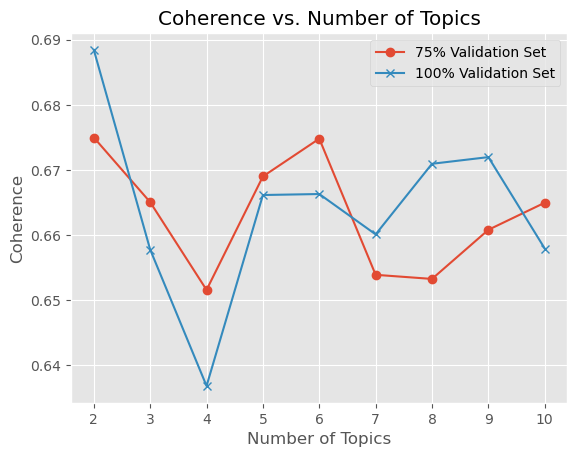

In [31]:
# separate the data by validation set
val_75 = lda_slcd[lda_slcd['Validation_Set'] == '75% Corpus']
val_100 = lda_slcd[lda_slcd['Validation_Set'] == '100% Corpus']

# plot the coherence values for 75% validation set
plt.plot(val_75['Topics'], val_75['Coherence'], label='75% Validation Set', marker='o', linestyle='-')

# plot the coherence values for 100% validation set
plt.plot(val_100['Topics'], val_100['Coherence'], label='100% Validation Set', marker='x', linestyle='-')

# customize the plot
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.title('Coherence vs. Number of Topics')
plt.legend()

# show the plot
plt.grid(True)
plt.show()

The graph above demonstrates the coherence score for the number of topics across validation sets (75% / 100%) with the fixed values of alpha (0.01) and beta (0.01). The graph results outlines the most optimal number of topics based on the highest coherence score, and thus it is 2.

In [32]:
lda_results_2 = lda_results[lda_results['Topics'] == 2]

max_coherence = lda_results_2['Coherence'].max()
print(f'The maximum Coherence value: {max_coherence}')

The maximum Coherence value: 0.729580289520851


In [33]:
lda_optimal = lda_results[lda_results['Coherence'] == max_coherence]
print(lda_optimal)

   Validation_Set  Topics               Alpha                Beta  Coherence
18     75% Corpus       2  0.9099999999999999  0.9099999999999999    0.72958


In [38]:
num_topics = 2

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha=0.9,
                                       eta=0.9)

In [39]:
import pyLDAvis
import pyLDAvis.gensim
import pickle 

# visualize the topics
pyLDAvis.enable_notebook()

# construct the file path for pyLDAvis data
LDAvis_data_filepath = os.path.join(os.path.dirname(os.path.abspath("Reviews NLP.ipynb")), 
                                    f'ldavis_prepared_{num_topics}.pkl')

# set the width for the pyLDAvis visualization
pyLDAvis.enable_notebook(m_vis='h')

# visualize the topics
pyLDAvis.enable_notebook()

# perform LDA visualization preparation only if needed
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# save the pyLDAvis visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, os.path.join(os.path.dirname(os.path.abspath("Reviews NLP.ipynb")), 
                                                 f'ldavis_prepared_{num_topics}.html'))

# display the pyLDAvis visualization
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.157847  0.0       1        1  64.009037
1     -0.157847  0.0       2        1  35.990963, topic_info=         Term         Freq        Total Category  logprob  loglift
161      good  5315.000000  5315.000000  Default  30.0000  30.0000
49      order  8665.000000  8665.000000  Default  29.0000  29.0000
62    service  5594.000000  5594.000000  Default  28.0000  28.0000
5        food  7132.000000  7132.000000  Default  27.0000  27.0000
25       fast  2547.000000  2547.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
265       kid   577.721141   736.992422   Topic2  -5.3335   0.7784
171    people   964.043877  2231.500415   Topic2  -4.8214   0.1826
112  location   856.855931  1731.525515   Topic2  -4.9393   0.3184
174    really   600.933642  1030.221579   Topic2  -5.2941   0.4829
59   customer   642.418735  2261.340416   Topic2  -5.2273  -0.2366

[155 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
20        1  0.360486  always
20        2  0.639634  always
476       1  0.997036  answer
476       2  0.005220  answer
381       1  0.007252  arcade
...     ...       ...     ...
125       2  0.001308  window
58        1  0.930916    work
58        2  0.069385    work
83        1  0.996798   wrong
83        2  0.002915   wrong

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

After reviewing the results, it is clear that 2 topics does not demonstrate all the topics within customers' opinions. Perhaps, it is necessary to see the results from a different view, selecting 6 as a number of topics since it has the second highest coherence score and the graph is decreased dramatically after that.

In [40]:
lda_results_6 = lda_results[lda_results['Topics'] == 6]

max_coherence = lda_results_6['Coherence'].max()
print(f'The maximum Coherence value: {max_coherence}')

The maximum Coherence value: 0.7225790271988942


In [41]:
lda_optimal = lda_results[lda_results['Coherence'] == max_coherence]
print(lda_optimal)

    Validation_Set  Topics       Alpha  Beta  Coherence
415    100% Corpus       6  asymmetric  0.01   0.722579


The maximum coherence score for 6 and 2 topics (0.73 and 0.72) are similar, and thus this could show us some hidden topics and a deeper understanding of the reviews.

In [44]:
num_topics = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       alpha='asymmetric',
                                       eta=0.01)

In [45]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(os.path.dirname(os.path.abspath("Reviews NLP.ipynb")), 
                                    f'ldavis_prepared_{num_topics}.pkl')
pyLDAvis.enable_notebook(m_vis='h')
pyLDAvis.enable_notebook()

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, os.path.join(os.path.dirname(os.path.abspath("Reviews NLP.ipynb")), 
                                                 f'ldavis_prepared_{num_topics}.html'))

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.116850  0.079449       1        1  27.568844
1      0.038688 -0.129000       2        1  21.420675
4     -0.154754  0.047007       3        1  20.506738
0      0.125501 -0.213199       4        1  15.776547
3     -0.131385  0.008682       5        1   8.646559
5      0.238800  0.207062       6        1   6.080637, topic_info=          Term         Freq        Total Category  logprob  loglift
161       good  6634.000000  6634.000000  Default  30.0000  30.0000
158  excellent  3105.000000  3105.000000  Default  29.0000  29.0000
62     service  6591.000000  6591.000000  Default  28.0000  28.0000
25        fast  3419.000000  3419.000000  Default  27.0000  27.0000
245       slow  1500.000000  1500.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
833    cashier   146.638860   556.004061   Topic6  -4.9264   1.4673
49       order   279.261536  9928.371232   Topic6  -4.2823  -0.7709
39         get   212.724466  6425.967180   Topic6  -4.5544  -0.6080
81        time   175.208227  3861.591364   Topic6  -4.7484  -0.2928
30    mcdonald   166.898230  4095.490025   Topic6  -4.7970  -0.4002

[532 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
485       1  0.135219  absolutely
485       2  0.038634  absolutely
485       3  0.003863  absolutely
485       4  0.057951  absolutely
485       5  0.598828  absolutely
...     ...       ...         ...
83        6  0.034588       wrong
126       3  0.992708        yell
1469      6  0.995559      yelled
2029      6  0.974691          yr
1252      4  0.986152       yummy

[1138 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4, 6])

## Conclusions

In conclusion, the sentiment analysis shows that the higher VADER scores tend to have higher review stars, while lower scores tend to have lower rating stars. Moreover, the majority of ratings stars given by customers are either 1 or 5, which demonstrates an enormous gap between positive and negative reviews. This phenomena perhaps the reason why 2 topics, that were positive and negative experiences, was the most optimal after calculations. However, it is important to note that 6 topics explain the nature of reviews in more depth. These topics are: 1) time; 2) positive experience in the restaurants; 3) customers' experience with the staff (mostly negative); 4) service and place; 5) menu items; 6) waiting experience.

This analysis can be developed in future by implementing models, different from the current ones, to compare how the results might possibly change and to show which models are better suited for these kind of analysis.